## 1. Considere el problema del robot aspiradora y la función de la agente presentada en la figura 2.2 del libro de Russell & Norvig (página 36 PDF). A partir de esto:

● Demuestre que, bajo las suposiciones presentadas en clase, la aspiradora tiene un comportamiento racional.

Primero que todo se debe definir que racional para un agente es hacer lo correcto y que el comportamiento del agente sea 'lo que se pide es lo que se obtiene'. Para que el agente sea racional debe completar las siguentes características:

- **Medición del rendimiento:** La medición de rendimiento del robot aspiradora puede ser el % de suciedad que remueve en un tiempo determinado (t) con una energía límitada (E). Ya que entre más tiempo dure el robot limpiando, su energía puede disminuir considerablemente. Lo siguiente puede expresarse matemáticamente mediante la siguiente ecuación:

$Rendimiento_{Robot}$ = $\frac{\text{Suciedad recogida}}{\text{Energía consumida}} \times 100\%$

- **Conocimiento del agente con su entorno:** Del entorno se sabe que es un tablero con una cantidad de casillas límitadas pero que pueden cambiar su dimensión si se desea. El entorno es parcialmente observable, se tiene una probabilidad del 50% de que una casilla contenga suciedad y el entorno posee otro agente que puede disminuir o aumentar el rendimiento del agente (robot), ya que la suciedad puede considerarse como otro agente porque cada vez que se ejecute la simulación, la suciedad cambia su posición. Esto último lo podemos denominar un espacio multiagente.

- **Acciones a realizar:** Las acciones del agente se pueden considerar como episodicas, ya que la decisión actual de limpiar o moverse, no dependen de las acciones anteriores.

- **Secuencia de percepciones:** El robor aspiradora debe sensar la casilla actual para tomar una acción. Es decir, este debe tener un sensor para poder determinar si hay suciedad o no y con base en esa percepción ejecutar una acción.

**De acuerdo a lo anterior, se puede cosiderar el robot aspiradora es racional, ya que se le pide al robot que perciba la suciedad de la casilla, ejecute la acción de limpiar o moverse a una casilla.**



 ● Para este mismo escenario diseñe una función para un agente racional cuya medida de desempeño disminuye
una unidad por cada movimiento. ¿En este caso se requiere un estado interno?

Si, efectivamente se requiere un estado interno para que el robot aspiradora tenga una medida cuantificable de desempeño (energía limitada).

- Se puede representar de la siguiente manera:

      si estado=sucio entonces aspirar

      de lo contrario si posición=A entonces mover a la derecha y disminuir 1 unidad

      de lo contratio si posición=B entonces mover a la izquierda y disminuir 1 unidad



## 2. Suponga que el comportamiento de un agente es evaluado a través de una métrica de desempeño que solo considera las primeras 𝑇 unidades de tiempo e ignora todo lo demás después de eso. Muestre que la racionalidad del agente no depende únicamente del estado del ambiente sino del tiempo disponible. Presente 2 ejemplos para esta situación.

- Para demostrar que la racionalidad del agente tambien depende del tiempo, partamos de la definición del agente, la cuál dice que: un agente es una entidad que percibe su ambiente a través de sensores y genera una acción mediante actuadores. En inteligencia artificial, definimos o representamos un agente mediante una máquina que implementa una función 'función del agente'. Las máquinas tienen  memoria y procesamiento limitados esto puede generar retrasos en las acciónes. La palabra retraso hace referencia al tiempo de ejecución de una acción. Recordemos que para implementar el modelo de un agente se debe implementar el PEAS (Performance, enviroment, actuators, sensors). En la mayoría de procesos, además de estas 4 variables existe una variable adicional que se llama perturbación del sistema. Una perturbación es una entidad que hace que las variables de proceso de desvíen de su valor estable o ideal (set point). En automatización, lo que se busca además de llevar las variables a un set point adecuado, es que en dado caso de tener una perturbación de alguna variable en el sistema, un sensor la perciba medida lo más rápido posible para que el actuador pueda ejecutar una acción determinada y manipular la perturbación de tal modo que la variable perturbada vuelva a estar en el set point adecuado. Por lo tanto, el tiempo que tome el sensor en percibir que la variable se desvió de su set point y el tiempo que tardó el actuador en ejecutar una acción, son cruciales en cualquier proceso.

- Ejemplo 1: Una nevera es un agente que posee sensores, actuadores, un ambiente interno y externo. La función de una nevera es mantener una temperatura adecuada interiormente para tener frescos los alimentos y bebidas. Cuando se abre la nevera se genera una perturbación, ya que la temperatura interior de esta aumenta porque por lo general el ambiente exterior está más caliente que el interior y por intercambio de calor el interior de la nevera gana energía y aumenta la temperatura del ambiente interno de la nevera. La temperatura interior aumenta dependiendo del tiempo en que se abra la nevera. Una vez se cierre nuevamente la nevera, el sensor percibe que la temperatura interior está por encima del set point y le da una señal a un actuador que por lo general es un compresor que posee un gas y lo recircula hasta que la temperatura vuelva a al punto que se quiere y los alimentos sigan frescos (hacer lo correcto). Si el sensor toma una lectura lenta o el actuador no ejecuta una acción de forma rápida, puede que los alimentos no se encuentren frescos y la nevera no cumpla con un rendimiento óptimo.


In [ ]:
# Esta gráfica representa el funcionamiento del agente nevera

import numpy as np
import matplotlib.pyplot as plt

# Tiempo en minutos
t = np.linspace(0, 30, 300)

# Temperatura inicial
set_point = -6

# Temperatura en función del tiempo
T = np.piecewise(t,
    [t < 10,                          # Estable antes de la perturbación
     (t >= 10) & (t < 11),           # Perturbación súbita
     (t >= 11) & (t < 20),           # Recuperación exponencial
     t >= 20],                       # Estabilización
    [lambda t: set_point,
     lambda t: 18,
     lambda t: set_point + (18 - set_point) * np.exp(-(t - 11)/2),
     lambda t: set_point]
)

# Crear la gráfica
plt.figure(figsize=(10,6))
plt.plot(t, T, label='Temperatura', color='blue', linewidth=2)
plt.axhline(y=set_point, color='red', linestyle='--', label='Set point (-6°C)')
plt.xlabel('Tiempo (min)', fontsize=12)
plt.ylabel('Temperatura (°C)', fontsize=12)
plt.title('Respuesta térmica de una nevera ante perturbación', fontsize=14)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

- Ejemplo 2: Un agente que se encuentra pasando una vía, el ambiente del agente se encuentra rodeado de automóviles, vías y semaforos. También existe una probabilidad de que un 0.1% de los automóviles se pasen el semáforo en rojo. La señal del semáforo quedó en rojo y el agente va pasando la vía pero la probabilidad del 0.1% en ese momento se dió y un automóvil se pasa el semaforo en rojo. Una vez el agente se percata de que el automóvil lo puede arrollar, sus sensores (ojos) tienen milésimas de segundo para darle una señal eléctrica a sus actuadores (piernas) para tomar la acción de moverse para un lado. Si toma la desición de moverse rápidamente, el agente puede llegar sano y salvo al otro lado de la calle, de lo contrario, ya no hay agente.

   ## 3. Utilizando como guía el notebook Robot_Aspiradora_IA disponible el One_Drive; construya una simulación para el problema del robot aspiradora. Implemente un agente reflexivo que limpie todas las hojas en el tablero considerando las siguientes especificaciones:
   
- El tamaño del ambiente y la ubicación de las hojas debe ser configurable.

- El agente debe tener los métodos avanzar, girar (90°, 180° y 270°) y el atributo de energía disponible.

- El agente debe recibir la posición y la energía inicial.

- Por cada movimiento (incluido aspirar) se consumirá una unidad de energía

- Si el agente no tiene energía, no podrá moverse

- El agente puede percibir las hojas en la casilla actual o en las casillas vecinas. No se incluyen las diagonales

- Cada vez que el agente utiliza el sensor que le permite determinar si hay hojas en las casillas vecinas, se consumirá una unidad de energía. Detectar hojas en la casilla actual no consume energía.

- Al agente solo puede aspirar en la casilla actual

- La ubicación de las hojas se define de manera aleatoria al inicio de la simulación donde cada celda tiene una probabilidad del 50% de contener hojas.

- Ejecute la simulación al menos 50 veces y calcule el promedio de la energía consumida y las hojas recogidas en cada ejecución.

Código modificado

In [15]:
## Simulación robot aspiradora 10 x 10 energía 100

from IPython.display import display, HTML
import ipywidgets as widgets
import time
import random

class Tablero:
    def __init__(self, tamano_celda=(50, 50), n_celdas=(5, 5)):
        self.out = widgets.HTML()
        display(self.out)
        self.tamano_celda = tamano_celda
        self.n_celdas = n_celdas

    def dibujar(self, objetos):
        tablero = "<table border='1'>{}</table>"
        filas = ""
        for i in range(self.n_celdas[1]):
            fila = ""
            for j in range(self.n_celdas[0]):
                contenido = ""
                for o in objetos:
                    if o.x == j and o.y == i:
                        if isinstance(o, Agente):
                            contenido += (
                                f"<div style='transform: rotate({o.angulo}deg);"
                                f"font-size:{o.tamano_emoticon}px;'>"
                                f"{o.emoticon}<span style='font-size:12px;'>({o.energia})</span></div>"
                            )
                        else:
                            contenido += (
                                f"<div style='transform: rotate({o.angulo}deg);"
                                f"font-size:{o.tamano_emoticon}px;'>{o.emoticon}</div>"
                            )
                fila += (
                    f"<td style='height:{self.tamano_celda[0]}px;"
                    f"width:{self.tamano_celda[1]}px'>{contenido}</td>"
                )
            filas += f"<tr>{fila}</tr>"
        self.out.value = tablero.format(filas)

class Objeto:
    def __init__(self, x, y, emoticon="🍂", angulo=0, tamano_emoticon=25):
        self.x = x
        self.y = y
        self.emoticon = emoticon
        self.angulo = angulo
        self.tamano_emoticon = tamano_emoticon

class Agente(Objeto):
    def __init__(self, x=0, y=0, angulo=90, energia=20, emoticon="🤖", tamano_emoticon=30, n_celdas_x=5, n_celdas_y=5):
        super().__init__(x, y, emoticon, angulo, tamano_emoticon)
        self.energia = energia
        self.n_celdas_x = n_celdas_x
        self.n_celdas_y = n_celdas_y

    def avanzar(self):
        if self.energia < 1:
            return
        if self.angulo == 0:
            self.y = max(0, self.y - 1)
        elif self.angulo == 90:
            self.x = min(self.n_celdas_x - 1, self.x + 1)
        elif self.angulo == 180:
            self.y = min(self.n_celdas_y - 1, self.y + 1)
        elif self.angulo == 270:
            self.x = max(0, self.x - 1)
        self.energia -= 1

    def girar(self, grados):
        if grados not in [90, 180, 270] or self.energia < 1:
            return
        self.angulo = (self.angulo + grados) % 360
        self.energia -= 1

    def limpiar(self, objetos):
        if self.energia < 1:
            return 0
        hojas_en_posicion = [o for o in objetos if o.x == self.x and o.y == self.y and o.emoticon == "🍂"]
        objetos[:] = [o for o in objetos if o not in hojas_en_posicion]
        self.energia -= 1
        return len(hojas_en_posicion)

    def percibir_hojas(self, objetos, ancho=5, alto=5):
        hojas_detectadas = []
        posiciones = [
            (self.x, self.y),
            (self.x, self.y - 1),
            (self.x, self.y + 1),
            (self.x - 1, self.y),
            (self.x + 1, self.y)
        ]
        posiciones_validas = [(x, y) for x, y in posiciones if 0 <= x < ancho and 0 <= y < alto]
        for obj in objetos:
            if obj.emoticon == "🍂" and (obj.x, obj.y) in posiciones_validas:
                hojas_detectadas.append((obj.x, obj.y))
        return hojas_detectadas

    def mover_a_hoja(self, hoja_pos):
        if self.energia < 1:
            return
        hx, hy = hoja_pos
        if hx > self.x:
            self.angulo = 90
        elif hx < self.x:
            self.angulo = 270
        elif hy > self.y:
            self.angulo = 180
        elif hy < self.y:
            self.angulo = 0
        self.avanzar()

def hay_suciedad(objetos):
    return any(o.emoticon == "🍂" for o in objetos)

# ------------------------------------------------------------------------------

N_celdas_x = int(input('Ingrese el número de celdas en el eje x :'))
N_celdas_y = int(input('Ingrese el número de celdas en el eje y :'))
n_energia = int(input('Ingrese el nivel de energia (1 - 100) del robot aspiradora :'))

agente = Agente(energia=n_energia, n_celdas_x=N_celdas_x, n_celdas_y=N_celdas_y)
objetos = [agente]

suciedad_recogida = 0
energia_inicial = agente.energia

for y in range(N_celdas_y):
    for x in range(N_celdas_x):
        if random.random() < 0.5:
            objetos.append(Objeto(x=x, y=y, emoticon="🍂"))

escenario = Tablero(n_celdas=(N_celdas_x, N_celdas_y))

fila = 0
while fila < N_celdas_y and agente.energia > 0 and hay_suciedad(objetos):
    direccion = 90 if fila % 2 == 0 else 270
    agente.girar((direccion - agente.angulo) % 360)

    for _ in range(N_celdas_x - 1):
        if agente.energia < 1 or not hay_suciedad(objetos):
            break
        hojas = agente.percibir_hojas(objetos, ancho=N_celdas_x, alto=N_celdas_y)
        if hojas:
            agente.mover_a_hoja(hojas[0])
        else:
            agente.avanzar()
        suciedad_recogida += agente.limpiar(objetos)
        escenario.dibujar(objetos)
        time.sleep(0.5)

    if fila < N_celdas_y - 1 and agente.energia >= 1:
        agente.girar((180 - agente.angulo) % 360)
        agente.avanzar()
        escenario.dibujar(objetos)
        time.sleep(0.5)

    fila += 1

# Limpieza final en última celda
if agente.energia >= 1 and hay_suciedad(objetos):
    suciedad_recogida += agente.limpiar(objetos)
    escenario.dibujar(objetos)

# 🔁 Fase extra: limpieza mientras haya energía restante
while agente.energia > 0 and hay_suciedad(objetos):
    hojas = agente.percibir_hojas(objetos, ancho=N_celdas_x, alto=N_celdas_y)
    if hojas:
        agente.mover_a_hoja(hojas[0])
    else:
        agente.girar(random.choice([90, 180, 270]))
        agente.avanzar()
    suciedad_recogida += agente.limpiar(objetos)
    escenario.dibujar(objetos)
    time.sleep(0.3)

agente.emoticon = "💀" if hay_suciedad(objetos) else "😎"
escenario.dibujar(objetos)

energia_consumida = energia_inicial - agente.energia
eficiencia = (suciedad_recogida / energia_consumida * 100) if energia_consumida else 0

tabla_html = f"""
<h3>📋 Resumen de limpieza</h3>
<table border='1' style='border-collapse: collapse; text-align: center; font-size:16px;'>
    <tr style='background-color: #f2f2f2;'>
        <th>🔋 Energía Inicial</th>
        <th>⚡ Energía Consumida</th>
        <th>🍂 Suciedad Recogida</th>
        <th>📈 Eficiencia (%)</th>
    </tr>
    <tr>
        <td>{energia_inicial}</td>
        <td>{energia_consumida}</td>
        <td>{suciedad_recogida}</td>
        <td>{eficiencia:.2f}</td>
    </tr>
</table>
"""

Ingrese el número de celdas en el eje x :5
Ingrese el número de celdas en el eje y :5
Ingrese el nivel de energia (1 - 100) del robot aspiradora :100


HTML(value='')

El siguiente código realiza 50 simulaciones (agente sin memoria) y calcula los rendimientos de cada simulación incluyendo un promedio de todas estas.


In [7]:
## Simulación robot aspiradora 50 simulaciones 'AGENTE SIN MEMORIA' 100 x 100 energía 100

import pandas as pd
from IPython.display import display, HTML
import ipywidgets as widgets
import time
import random

# ---------------------- CLASES BASE ----------------------

class Tablero:
    def __init__(self, tamano_celda=(50, 50), n_celdas=(5, 5)):
        self.out = widgets.HTML()
        display(self.out)
        self.tamano_celda = tamano_celda
        self.n_celdas = n_celdas

    def dibujar(self, objetos):
        tablero = "<table border='1'>{}</table>"
        filas = ""
        for i in range(self.n_celdas[1]):
            fila = ""
            for j in range(self.n_celdas[0]):
                contenido = ""
                for o in objetos:
                    if o.x == j and o.y == i:
                        if isinstance(o, Agente):
                            contenido += (
                                f"<div style='transform: rotate({o.angulo}deg);"
                                f"font-size:{o.tamano_emoticon}px;'>"
                                f"{o.emoticon}<span style='font-size:12px;'>({o.energia})</span></div>"
                            )
                        else:
                            contenido += (
                                f"<div style='transform: rotate({o.angulo}deg);"
                                f"font-size:{o.tamano_emoticon}px;'>{o.emoticon}</div>"
                            )
                fila += (
                    f"<td style='height:{self.tamano_celda[0]}px;"
                    f"width:{self.tamano_celda[1]}px'>{contenido}</td>"
                )
            filas += f"<tr>{fila}</tr>"
        self.out.value = tablero.format(filas)

class Objeto:
    def __init__(self, x, y, emoticon="🍂", angulo=0, tamano_emoticon=25):
        self.x = x
        self.y = y
        self.emoticon = emoticon
        self.angulo = angulo
        self.tamano_emoticon = tamano_emoticon

class Agente(Objeto):
    def __init__(self, x=0, y=0, angulo=90, energia=20, emoticon="🤖", tamano_emoticon=30, n_celdas_x=5, n_celdas_y=5):
        super().__init__(x, y, emoticon, angulo, tamano_emoticon)
        self.energia = energia
        self.n_celdas_x = n_celdas_x
        self.n_celdas_y = n_celdas_y

    def avanzar(self):
        if self.energia < 1:
            return
        if self.angulo == 0:
            self.y = max(0, self.y - 1)
        elif self.angulo == 90:
            self.x = min(self.n_celdas_x - 1, self.x + 1)
        elif self.angulo == 180:
            self.y = min(self.n_celdas_y - 1, self.y + 1)
        elif self.angulo == 270:
            self.x = max(0, self.x - 1)
        self.energia -= 1

    def girar(self, grados):
        if grados not in [90, 180, 270] or self.energia < 1:
            return
        self.angulo = (self.angulo + grados) % 360
        self.energia -= 1

    def limpiar(self, objetos):
        if self.energia < 1:
            return 0
        hojas_en_posicion = [o for o in objetos if o.x == self.x and o.y == self.y and o.emoticon == "🍂"]
        objetos[:] = [o for o in objetos if o not in hojas_en_posicion]
        self.energia -= 1
        return len(hojas_en_posicion)

    def percibir_hojas(self, objetos, ancho=5, alto=5):
        hojas_detectadas = []
        posiciones = [
            (self.x, self.y),
            (self.x, self.y - 1),
            (self.x, self.y + 1),
            (self.x - 1, self.y),
            (self.x + 1, self.y)
        ]
        posiciones_validas = [(x, y) for x, y in posiciones if 0 <= x < ancho and 0 <= y < alto]
        for obj in objetos:
            if obj.emoticon == "🍂" and (obj.x, obj.y) in posiciones_validas:
                hojas_detectadas.append((obj.x, obj.y))
        return hojas_detectadas

    def mover_a_hoja(self, hoja_pos):
        if self.energia < 1:
            return
        hx, hy = hoja_pos
        if hx > self.x:
            self.angulo = 90
        elif hx < self.x:
            self.angulo = 270
        elif hy > self.y:
            self.angulo = 180
        elif hy < self.y:
            self.angulo = 0
        self.avanzar()

def hay_suciedad(objetos):
    return any(o.emoticon == "🍂" for o in objetos)

# ---------------------- FUNCIÓN DE SIMULACIÓN ----------------------

def ejecutar_simulacion(N_celdas_x, N_celdas_y, n_energia, visualizar=False):
    agente = Agente(energia=n_energia, n_celdas_x=N_celdas_x, n_celdas_y=N_celdas_y)
    objetos = [agente]
    suciedad_recogida = 0
    energia_inicial = agente.energia

    for y in range(N_celdas_y):
        for x in range(N_celdas_x):
            if random.random() < 0.5:
                objetos.append(Objeto(x=x, y=y, emoticon="🍂"))

    if visualizar:
        escenario = Tablero(n_celdas=(N_celdas_x, N_celdas_y))
        escenario.dibujar(objetos)

    fila = 0
    while fila < N_celdas_y and agente.energia > 0 and hay_suciedad(objetos):
        direccion = 90 if fila % 2 == 0 else 270
        agente.girar((direccion - agente.angulo) % 360)

        for _ in range(N_celdas_x - 1):
            if agente.energia < 1 or not hay_suciedad(objetos):
                break
            hojas = agente.percibir_hojas(objetos, ancho=N_celdas_x, alto=N_celdas_y)
            if hojas:
                agente.mover_a_hoja(hojas[0])
            else:
                agente.avanzar()
            suciedad_recogida += agente.limpiar(objetos)
            if visualizar:
                escenario.dibujar(objetos)
                time.sleep(0.1)

        if fila < N_celdas_y - 1 and agente.energia >= 1:
            agente.girar((180 - agente.angulo) % 360)
            agente.avanzar()
            if visualizar:
                escenario.dibujar(objetos)
                time.sleep(0.1)

        fila += 1

    if agente.energia >= 1 and hay_suciedad(objetos):
        suciedad_recogida += agente.limpiar(objetos)
        if visualizar:
            escenario.dibujar(objetos)

    energia_consumida = energia_inicial - agente.energia
    eficiencia = (suciedad_recogida / energia_consumida * 100) if energia_consumida else 0

    return energia_inicial, energia_consumida, suciedad_recogida, eficiencia

# ---------------------- EJECUCIÓN DE 50 SIMULACIONES ----------------------

N_simulaciones = 50
N_celdas_x = int(input('Ingrese el número de casillas en el eje x : '))
N_celdas_y =  int(input('Ingrese el número de casillas en el eje y : '))
energia_robot = int(input('Ingrese el nivel de energía del robot aspiradora : '))

resultados = {
    'Simulación': [],
    '🔋 Energía Inicial': [],
    '⚡ Energía Consumida': [],
    '🍂 Suciedad Recogida': [],
    '📈 Eficiencia (%)': []
}
5
for i in range(1, N_simulaciones + 1):
    ei, ec, sr, ef = ejecutar_simulacion(N_celdas_x, N_celdas_y, energia_robot)
    resultados['Simulación'].append(i)
    resultados['🔋 Energía Inicial'].append(ei)
    resultados['⚡ Energía Consumida'].append(ec)
    resultados['🍂 Suciedad Recogida'].append(sr)
    resultados['📈 Eficiencia (%)'].append(round(ef, 2))

df_resultados = pd.DataFrame(resultados)

# Fila de promedio
promedios = df_resultados.drop(columns='Simulación').mean()
fila_promedio = pd.DataFrame([['Promedio'] + [round(v, 2) for v in promedios.values]],
                             columns=df_resultados.columns)
df_resultados = pd.concat([df_resultados, fila_promedio], ignore_index=True)

# Mostrar tabla final
html = """
<h3>📊 Resultados de 50 simulaciones del robot aspiradora</h3>
<table>...</table>
"""
print(df_resultados.to_string(index=False))

Ingrese el número de casillas en el eje x : 100
Ingrese el número de casillas en el eje y : 100
Ingrese el nivel de energía del robot aspiradora : 100
Simulación  🔋 Energía Inicial  ⚡ Energía Consumida  🍂 Suciedad Recogida  📈 Eficiencia (%)
         1              100.0                100.0                 1.00              1.00
         2              100.0                100.0                24.00             24.00
         3              100.0                100.0                 8.00              8.00
         4              100.0                100.0                17.00             17.00
         5              100.0                100.0                 7.00              7.00
         6              100.0                100.0                 2.00              2.00
         7              100.0                100.0                 5.00              5.00
         8              100.0                100.0                 7.00              7.00
         9              100.0          

## 4. Implemente un agente con estado para solucionar el problema. Ejecute la simulación al menos 50 veces y calcule el promedio de la energía consumida y las hojas recogidas en cada ejecución.

In [8]:
## Simulación robot aspiradora 50 simulaciones 'AGENTE CON MEMORIA' 100 X 100 Energía 100

import pandas as pd
from IPython.display import display, HTML
import ipywidgets as widgets
import time
import random

# ---------------------- CLASES BASE ----------------------

class Tablero:
    def __init__(self, tamano_celda=(50, 50), n_celdas=(5, 5)):
        self.out = widgets.HTML()
        display(self.out)
        self.tamano_celda = tamano_celda
        self.n_celdas = n_celdas

    def dibujar(self, objetos):
        tablero = "<table border='1'>{}</table>"
        filas = ""
        for i in range(self.n_celdas[1]):
            fila = ""
            for j in range(self.n_celdas[0]):
                contenido = ""
                for o in objetos:
                    if o.x == j and o.y == i:
                        if isinstance(o, Agente):
                            contenido += (
                                f"<div style='transform: rotate({o.angulo}deg);"
                                f"font-size:{o.tamano_emoticon}px;'>"
                                f"{o.emoticon}<span style='font-size:12px;'>({o.energia})</span></div>"
                            )
                        else:
                            contenido += (
                                f"<div style='transform: rotate({o.angulo}deg);"
                                f"font-size:{o.tamano_emoticon}px;'>{o.emoticon}</div>"
                            )
                fila += (
                    f"<td style='height:{self.tamano_celda[0]}px;"
                    f"width:{self.tamano_celda[1]}px'>{contenido}</td>"
                )
            filas += f"<tr>{fila}</tr>"
        self.out.value = tablero.format(filas)

class Objeto:
    def __init__(self, x, y, emoticon="🍂", angulo=0, tamano_emoticon=25):
        self.x = x
        self.y = y
        self.emoticon = emoticon
        self.angulo = angulo
        self.tamano_emoticon = tamano_emoticon

class Agente(Objeto):
    def __init__(self, x=0, y=0, angulo=90, energia=20, emoticon="🤖", tamano_emoticon=30, n_celdas_x=5, n_celdas_y=5):
        super().__init__(x, y, emoticon, angulo, tamano_emoticon)
        self.energia = energia
        self.n_celdas_x = n_celdas_x
        self.n_celdas_y = n_celdas_y
        self.memoria = set()

    def registrar_visita(self):
        self.memoria.add((self.x, self.y))

    def avanzar(self):
        if self.energia < 1:
            return
        if self.angulo == 0:
            self.y = max(0, self.y - 1)
        elif self.angulo == 90:
            self.x = min(self.n_celdas_x - 1, self.x + 1)
        elif self.angulo == 180:
            self.y = min(self.n_celdas_y - 1, self.y + 1)
        elif self.angulo == 270:
            self.x = max(0, self.x - 1)
        self.energia -= 1
        self.registrar_visita()

    def girar(self, grados):
        if grados not in [90, 180, 270] or self.energia < 1:
            return
        self.angulo = (self.angulo + grados) % 360
        self.energia -= 1

    def limpiar(self, objetos):
        if self.energia < 1:
            return 0
        hojas_en_posicion = [o for o in objetos if o.x == self.x and o.y == self.y and o.emoticon == "🍂"]
        objetos[:] = [o for o in objetos if o not in hojas_en_posicion]
        self.energia -= 1
        return len(hojas_en_posicion)

    def percibir_hojas(self, objetos, ancho=5, alto=5):
        hojas_detectadas = []
        posiciones = [
            (self.x, self.y),
            (self.x, self.y - 1),
            (self.x, self.y + 1),
            (self.x - 1, self.y),
            (self.x + 1, self.y)
        ]
        posiciones_validas = [(x, y) for x, y in posiciones if 0 <= x < ancho and 0 <= y < alto]
        for obj in objetos:
            if obj.emoticon == "🍂" and (obj.x, obj.y) in posiciones_validas and (obj.x, obj.y) not in self.memoria:
                hojas_detectadas.append((obj.x, obj.y))
        return hojas_detectadas

    def mover_a_hoja(self, hoja_pos):
        if self.energia < 1:
            return
        hx, hy = hoja_pos
        if hx > self.x:
            self.angulo = 90
        elif hx < self.x:
            self.angulo = 270
        elif hy > self.y:
            self.angulo = 180
        elif hy < self.y:
            self.angulo = 0
        self.avanzar()

    def explorar(self):
        # Mover hacia casilla no visitada más cercana
        vecinos = [
            (self.x, self.y - 1, 0),
            (self.x + 1, self.y, 90),
            (self.x, self.y + 1, 180),
            (self.x - 1, self.y, 270)
        ]
        for nx, ny, ang in vecinos:
            if 0 <= nx < self.n_celdas_x and 0 <= ny < self.n_celdas_y and (nx, ny) not in self.memoria:
                self.angulo = ang
                self.avanzar()
                return True
        return False  # No hay casillas nuevas cercanas

# ---------------------- FUNCIÓN DE SIMULACIÓN ----------------------

def ejecutar_simulacion(N_celdas_x, N_celdas_y, n_energia, visualizar=False):
    agente = Agente(energia=n_energia, n_celdas_x=N_celdas_x, n_celdas_y=N_celdas_y)
    objetos = [agente]
    suciedad_recogida = 0
    energia_inicial = agente.energia

    for y in range(N_celdas_y):
        for x in range(N_celdas_x):
            if random.random() < 0.5:
                objetos.append(Objeto(x=x, y=y, emoticon="🍂"))

    if visualizar:
        escenario = Tablero(n_celdas=(N_celdas_x, N_celdas_y))
        escenario.dibujar(objetos)

    fila = 0
    while fila < N_celdas_y and agente.energia > 0 and hay_suciedad(objetos):
        direccion = 90 if fila % 2 == 0 else 270
        agente.girar((direccion - agente.angulo) % 360)

        for _ in range(N_celdas_x - 1):
            if agente.energia < 1 or not hay_suciedad(objetos):
                break
            hojas = agente.percibir_hojas(objetos, ancho=N_celdas_x, alto=N_celdas_y)
            if hojas:
                agente.mover_a_hoja(hojas[0])
            elif not agente.explorar():
                agente.avanzar()
            suciedad_recogida += agente.limpiar(objetos)
            if visualizar:
                escenario.dibujar(objetos)
                time.sleep(0.1)

        if fila < N_celdas_y - 1 and agente.energia >= 1:
            agente.girar((180 - agente.angulo) % 360)
            agente.avanzar()
            if visualizar:
                escenario.dibujar(objetos)
                time.sleep(0.1)

        fila += 1

    if agente.energia >= 1 and hay_suciedad(objetos):
        suciedad_recogida += agente.limpiar(objetos)
        if visualizar:
            escenario.dibujar(objetos)

    energia_consumida = energia_inicial - agente.energia
    eficiencia = (suciedad_recogida / energia_consumida * 100) if energia_consumida else 0

    return energia_inicial, energia_consumida, suciedad_recogida, eficiencia

# ---------------------- EJECUCIÓN DE 50 SIMULACIONES ----------------------

N_simulaciones = 50
N_celdas_x = int(input('Ingrese el número de casillas en el eje x : '))
N_celdas_y =  int(input('Ingrese el número de casillas en el eje y : '))
energia_robot = int(input('Ingrese el nivel de energía del robot aspiradora : '))

resultados = {
    'Simulación': [],
    '🔋 Energía Inicial': [],
    '⚡ Energía Consumida': [],
    '🍂 Suciedad Recogida': [],
    '📈 Eficiencia (%)': []
}

for i in range(1, N_simulaciones + 1):
    ei, ec, sr, ef = ejecutar_simulacion(N_celdas_x, N_celdas_y, energia_robot)
    resultados['Simulación'].append(i)
    resultados['🔋 Energía Inicial'].append(ei)
    resultados['⚡ Energía Consumida'].append(ec)
    resultados['🍂 Suciedad Recogida'].append(sr)
    resultados['📈 Eficiencia (%)'].append(round(ef, 2))

df_resultados = pd.DataFrame(resultados)

# Fila de promedio
promedios = df_resultados.drop(columns='Simulación').mean()
fila_promedio = pd.DataFrame([['Promedio'] + [round(v, 2) for v in promedios.values]],
                             columns=df_resultados.columns)
df_resultados = pd.concat([df_resultados, fila_promedio], ignore_index=True)

# Mostrar tabla final
html = """
<h3>📊 Resultados de 50 simulaciones del robot aspiradora</h3>
<table>...</table>
"""
print(df_resultados.to_string(index=False))

Ingrese el número de casillas en el eje x : 100
Ingrese el número de casillas en el eje y : 100
Ingrese el nivel de energía del robot aspiradora : 100
Simulación  🔋 Energía Inicial  ⚡ Energía Consumida  🍂 Suciedad Recogida  📈 Eficiencia (%)
         1              100.0                100.0                 37.0              37.0
         2              100.0                100.0                 33.0              33.0
         3              100.0                100.0                 34.0              34.0
         4              100.0                100.0                  3.0               3.0
         5              100.0                100.0                 32.0              32.0
         6              100.0                100.0                  5.0               5.0
         7              100.0                100.0                 13.0              13.0
         8              100.0                100.0                  8.0               8.0
         9              100.0          

CONCLUSIÓN:

Después de haber comparado las dos simulaciones (sin memoria y con memoria) los resultados son:


- Por cada suciedad retirada, el robot consume una unidad de energía. Entonces, suponemos que cada suciedad puede valorarse en una unidad de energía.

- Se debe tener en cuenta que el rendimiento esta representado por la siguiente expresión:

$Eficiencia_{Robot}$ = $\frac{\text{Suciedad recogida}}{\text{Energía consumida}} \times 100\%$

- La expresión nos puede indicar que si aumentamos la energía en un ambiente pequeño, el rendimiento puede decaer, ya que habrá poca suciedad que recoger y una energía grande. Por el contrario, si se tiene una cuadrícula grande con suciedad alta y energía moderada, el rendimiento del robot aumentará porque recoge más unidades de suciedad con una energía limitada.

- Entre menos celdas, menor es la diferencia en los rendimientos.
- Al aumentar la cuadrícula, se evidencia que la simulación con memoria aumenta el rendimiento. Por ejemplo 100 x 100 con energía de 100.

##5. Utilizando MESA y siguiendo el articulo “A simple agent based infection model with Mesa and Bokeh” (ENLACE) implemente el modelo basado en agentes que explica el comportamiento de un virus. Utilizando los resultados, indique  cuales serían las estrategias para reducir el factor de contagio para próximas pandemias. Implemente estas estrategias en el modelo.

NOTA: Antes de ejecutar el código toca instalar la versión de mesa 1.2.1 porque la versión actual me da errores al ejecutar el código.

In [1]:
!pip install mesa==1.2.1 # Instalación de mesa (versión estable)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.7 MB/s eta 0:00:00


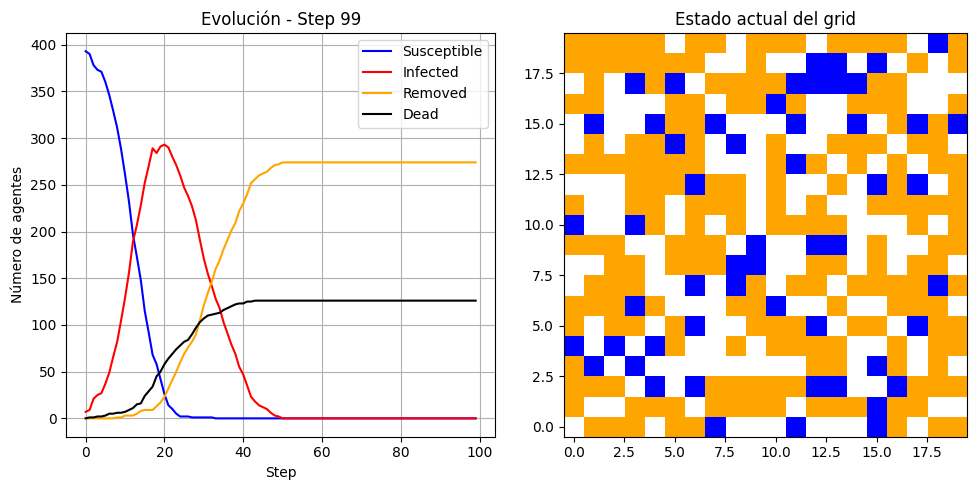

,Step,Susceptible,Infected,Removed,Dead
99,99,0,0,274,126


In [16]:
# videojuego (solo jugar)

import time # para medir duración o pausas (aunque no se usa directamente aquí).
import numpy as np
import pandas as pd
import pylab as plt
from mesa import Agent, Model # clase base para cada agente (persona).clase base para el modelo general.
from mesa.time import RandomActivation # hace que los agentes se activen en orden aleatorio.
from mesa.space import MultiGrid # define el espacio donde los agentes se mueven
from mesa.datacollection import DataCollector # recolecta datos de los agentes en cada paso.
import enum # Se usa para definir los estados del agente (susceptible, infectado, removido)

# Librerias que preparan la visualización interactiva con Bokeh y Panel (No las uso en este código)

# from bokeh.plotting import figure, show
# from bokeh.models import ColumnDataSource, Line, Legend, HoverTool, LinearColorMapper
# from bokeh.palettes import Category10
# import panel as pn
# pn.extension()


class InfectionModel(Model):
    """A model for infection spread."""

    def __init__(self, N=10, width=10, height=10, ptrans=0.5,
                 death_rate=0.02, recovery_days=21,
                 recovery_sd=7):

        self.num_agents = N # Número de agentes
        self.recovery_days = recovery_days # Días de recuperación
        self.recovery_sd = recovery_sd # Desviación estándar en días de recuperación
        self.ptrans = ptrans # Probabilidad de ser infectado
        self.death_rate = death_rate # Probabilidad de que un infectado muera
        self.grid = MultiGrid(width, height, True) # Crea el tamaño del grid o la red. El true permite que los agentes compartan celda
        self.schedule = RandomActivation(self) # Define cómo se activan los agentes: en orden aleatorio cada paso
        self.running = True # Controla si el modelo sigue corriendo y guarda agentes muertos
        self.dead_agents = [] # Lista vacía que guarda los agentes muertos


        # CREACIÓN DE LOS AGENTES Y EL ESTADO

        for i in range(self.num_agents):
            a = MyAgent(i, self)
            self.schedule.add(a) # Activación aleatoria de los agentes

            # Adiciona cada gente aleatoriamente en el grid
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))
            # Crea agentes infectados para el inicio (star) aleatoriamente
            infected = np.random.choice([0,1], p=[0.98,0.02]) # Selecciona un número de 0 a 1 con probabilidades de 98% y 2% respectivamente (1 para infectado y 0 para no infectado)
            if infected == 1:
                a.state = State.INFECTED # Etiqueta el estado inicial a (infectado) con un 98% de probabilidad según el random.choise State es una clase
                a.infection_time = self.schedule.time # Inicia el tiempo de infección
                a.recovery_time = self.get_recovery_time() # Tiempo de recuperación

        self.datacollector = DataCollector(agent_reporters={"State": "state"}) # Reporta y guarda los datos de estado (suceptible, infectado, removido) en un diccionario con una etiqueta llamada State y guarda los datos de state

    def get_recovery_time(self): # Defina la función de recuperación
        return int(self.random.normalvariate(self.recovery_days,self.recovery_sd)) # Genera un número aleatorio con base en una distribución normal o gaussiana (media,desviación std)

    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()


##############################################################################

class State(enum.IntEnum): # Crea la clasa estado del agente y le asigna un valor
    SUSCEPTIBLE = 0
    INFECTED = 1
    REMOVED = 2

class MyAgent(Agent): # Crea la clase agente
    """ An agent in an epidemic model."""
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model) # Hereda las dos variables unique_id y model de la clase Agent
        self.age = self.random.normalvariate(20,40) # Ingresa la edad aleatoriamente con 20 años 'media' desviación estándar de 40 años
        self.state = State.SUSCEPTIBLE # El estado es suceptible
        self.infection_time = 0 # Inicializa el tiempo de infección
        self.recovery_time = 0 # Initializa tiempo de recuperación

    def move(self): # Función movimiento del agente

        possible_steps = self.model.grid.get_neighborhood(self.pos,moore=True,include_center=False)
        # self.model.grid : Accede al objeto de la cuadrícula (entorno)
        # get_neighborhood: Método que busca las celdas vecinas
        # self.pos : Posición actual del agente
        # Este parámetro indica que se consideren todos los vecinos en un radio de 3x3, incluyendo las celdas en diagonal. Esto se conoce como el vecindario de Moore
        # Excluye la posición actual del agente del conjunto de celdas vecinas. Esto asegura que el agente se mueva a una nueva celda y no se quede en el mismo lugar.

        new_position = self.random.choice(possible_steps) # Determina la nueva posición del agente
        self.model.grid.move_agent(self, new_position) # Mueve al agente a la nueva posición

    def status(self): # Función estado del agente

        """Verifica el estado de infección del agente"""

        if self.state == State.INFECTED:
            drate = self.model.death_rate # Si el agente se encuentra infectado, este tiene el 2% según el modelo de probabilidad de morir
            alive = np.random.choice([0,1], p=[drate,1-drate]) # Probabilidad de vivir del agente
            if alive == 0:
                self.model.schedule.remove(self) # Remueve el agente infectado (muerto) de la simulación para que no interactúe con ningun otro agente

            else: # Solo revisa la recuperanción si el agente está vivo
                t = self.model.schedule.time-self.infection_time
                if t >= self.recovery_time: # Si el tiempo transcurrido desde la infección es mayor o igual al tiempo de recuperación
                    self.state = State.REMOVED # Si el agente sobrevive y alcanza el tiempo de recuperación, adquiere inmunidad por lo que ya no es infeccioso ni suceptible a infectarse de nuevo


    def contact(self): # Método que encuentra contactos cercanos y propagar la infección

        cellmates = self.model.grid.get_cell_list_contents([self.pos]) # devuelve una lista de todos los agentes que están en la misma celda que este agente.

        if len(cellmates) > 1: # Verificación de si hay más de una agente en la celda. Si el agente está solo, no hay posibilidad de contagiar a nadie, así que se omite el resto.
            for other in cellmates: # Recorre cada agente en la misma celda
                if self.random.random() < self.model.ptrans: # Se genera un número aleatorio entre 0 y 1. Si el número es menor que self.model.ptrans (probabilidad de transmisión)
                                                              # se considera que el contacto fue suficiente para contagiar
                    if self.state is State.INFECTED and other.state is State.SUSCEPTIBLE: # Verifica si el estado del agente actual es infectado y el otro agente es suceptible pero vulnerable
                                                                                          # Solo en este caso se permite el contagio
                        other.state = State.INFECTED # Cambia el estado del otro agente a 'infectado'
                        other.infection_time = self.model.schedule.time # Calcula el tiempo en que el agente fue infectado para verificar más adelante si pasó el tiempo para curarse
                        other.recovery_time = self.model.get_recovery_time() # Asigna el tiempo de recuperación aleatorio teniendo en cuenta el tiempo y la desviación estándar


    def step(self): # Define lo que realiza cada agente en cada paso de la simulación
        self.status() # Estado del agente
        self.move() # Movimiento a realizar del agente
        self.contact() # Contacto con otros agentes


##################################################################################

# # Define pop and steps before using them
# pop = 100 # Tamaño de la población
# steps = 100 # Número de pasos (en este caso días)

# model = InfectionModel(pop, 20, 20, ptrans=0.5)
# for i in range(steps):
#     model.step() # Registra cada paso de cada agente (estado, movimiento y contacto)
# agent_state = model.datacollector.get_agent_vars_dataframe() # Extrae los datos recolectados de cada agente en un DataFrame

################################################################################

def get_column_data(model): #  Es una función compacta pero poderosa que transforma los datos recolectados por agente en una tabla agregada por estado y paso de simulación

    agent_state = model.datacollector.get_agent_vars_dataframe() # Extrae los datos recolectados de cada agente en un DataFrame
    X = pd.pivot_table(agent_state.reset_index(),index='Step',columns='State',aggfunc=np.size,fill_value=0) # Crea una tabla dinámica (pivot_table) que cuenta cuántos agentes hay en cada estado por paso.
                                                                                                            # Reset_index() asegura que Step esté como columna, no como índice.
                                                                                                            # aggfunc=np.size cuenta el número de ocurrencias por combinación Step–State.
                                                                                                            # fill_value=0 evita valores nulos si algún estado no aparece en un paso.


    labels = ['Susceptible','Infected','Removed'] # Renombra las columnas
    X.columns = labels[:len(X.columns)] #
    return X



################################################################################

# ESTO ES SI LAL VISUALIZACIÓN SE HICIESE EN BOKEH Y PANEL (ME ARROJABA ERRO Y ME TOCÓ BUSCAR OTRA ALTERNATIVA DE VISUALIZACIÓN)


# def plot_states_bokeh(model,title=''): # Genera una gráfica interactiva con Bokeh que muestra cómo varía el número de agentes en cada estado (Susceptible, Infected, Removed) a lo largo del tiempo.

#     X = get_column_data(model) # devuelve un DataFrame con conteos por estado y paso.
#     X = X.reset_index() # convierte Step en columna para que Bokeh pueda usarla como eje X.
#     source = ColumnDataSource(X) # Es el formato que Bokeh necesita para vincular datos a los gráficos
#     i=0
#     colors = Category10[3]
#     items=[]
#     p = figure(width=600,height=400,tools=['pan', 'wheel_zoom', 'box_zoom', 'reset', 'hover'],title=title,x_range=(0,100)) # Configura el gráfico
#     for c in X.columns[1:]: # Itera sobre las columnas de estado
#         line = Line(x='Step',y=c, line_color=colors[i],line_width=3,line_alpha=.8,name=c)
#         glyph = p.add_glyph(source, line)
#         i+=1
#         items.append((c,[glyph]))

#     p.xaxis.axis_label = 'Step'
#     p.add_layout(Legend(location='center_right',
#                 items=items))
#     p.background_fill_color = "#e1e1ea"
#     p.background_fill_alpha = 0.5
#     p.legend.label_text_font_size = "10pt"
#     p.title.text_font_size = "15pt"
#     p.toolbar.logo = None
#     p.sizing_mode = 'scale_height'
#     return p


################################################################################

def grid_values(model): # mapear el estado de los agentes en cada celda del grid
    """Get grid cell states"""

    agent_counts = np.zeros((model.grid.width, model.grid.height))
    w=model.grid.width
    df=pd.DataFrame(agent_counts)
    for cell in model.grid.coord_iter():
        agents, x, y = cell
        c=None
        for a in agents:
            c = a.state
        df.iloc[x,y] = c
    return df

# def plot_cells_bokeh(model): # visualizar el estado espacial del grid en un paso de simulación usando Bokeh

#     agent_counts = np.zeros((model.grid.width, model.grid.height))
#     w=model.grid.width
#     df=grid_values(model)
#     df = pd.DataFrame(df.stack(), columns=['value']).reset_index()
#     columns = ['value']
#     x = [(i, "@%s" %i) for i in columns]
#     hover = HoverTool(
#         tooltips=x, point_policy='follow_mouse')
#     colors = Category10[3]
#     mapper = LinearColorMapper(palette=colors, low=df.value.min(), high=df.value.max())
#     p = figure(width=500,height=500, tools=[hover], x_range=(-1,w), y_range=(-1,w))
#     p.rect(x="level_0", y="level_1", width=1, height=1,
#        source=df,
#        fill_color={'field':'value', 'transform': mapper},
#        line_color='black')
#     p.background_fill_color = "black"
#     p.grid.grid_line_color = None
#     p.axis.axis_line_color = None
#     p.toolbar.logo = None
#     return p


###############################################################################
# Reinstancia el modelo

#####################################################################################

import matplotlib.pyplot as plt
from IPython.display import clear_output

# Reinstancia el modelo
steps = 100
pop = 400 # Número de población



model = InfectionModel(pop, 20,20, ptrans=0.5, death_rate=0.02)

# Inicializa listas para guardar los conteos
susceptible = []
infected = []
removed = []
dead=[]

# Simulación paso a paso con visualización
for i in range(steps):
    model.step()
    X = get_column_data(model)
    s = X['Susceptible'].iloc[-1] if 'Susceptible' in X.columns else 0
    inf = X['Infected'].iloc[-1] if 'Infected' in X.columns else 0
    rem = X['Removed'].iloc[-1] if 'Removed' in X.columns else 0
    dea=pop-(s+inf+rem)

    susceptible.append(s)
    infected.append(inf)
    removed.append(rem)
    dead.append(dea)

    # Visualiza en tiempo real ambas gráficas
    clear_output(wait=True)
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Gráfico de evolución temporal
    axs[0].plot(susceptible, label='Susceptible', color='blue')
    axs[0].plot(infected, label='Infected', color='red')
    axs[0].plot(removed, label='Removed', color='orange')
    axs[0].plot(dead, label='Dead', color='black')
    axs[0].set_title(f"Evolución - Step {i}")
    axs[0].set_xlabel("Step")
    axs[0].set_ylabel("Número de agentes")
    axs[0].legend()
    axs[0].grid(True)

    # Gráfico del estado actual del grid

    from matplotlib.colors import ListedColormap

    # Colores consistentes con evolución temporal
    custom_cmap = ListedColormap(['blue', 'red', 'orange'])

    # Dentro del bucle de simulación
    grid = grid_values(model)
    im = axs[1].imshow(grid.values.T, cmap=custom_cmap, origin='lower')
    axs[1].set_title("Estado actual del grid")
    axs[1].axis('on')



    plt.tight_layout()
    plt.show()


# Implementar tabla

import pandas as pd
dead = [pop - (s + i + r) for s, i, r in zip(susceptible, infected, removed)]

# Crear tabla con los datos de cada step
tabla_resultados = pd.DataFrame({
    'Step': list(range(steps)),
    'Susceptible': susceptible,
    'Infected': infected,
    'Removed': removed, 'Dead': dead})

# Mostrar la tabla completa
#tabla_resultados
tabla_resultados.tail(1)

## ANÁLISIS


- Se ejecutaron diferentes simulaciones para obtener promedios de estas y poder realizar un análisis del modelo. En la siguiente tabla se muestran los promedios de cada simulación así como las variables de ejecución respectiva (N° agentes, tamaño de la cuadrilla). La probabilidad de muerte es del 2% y de ser infectado es de 50%.

$$
\begin{array}{|c|c|c|c|c|}
\hline
\begin{array}{c}\textbf{Simulaciones}\\\textbf{realizadas (100 steps)}\end{array} & \textbf{Población} & \textbf{Tamaño cuadrilla} & \textbf{Promedio Muertos} & \begin{array}{c}\textbf{Desv. estándar}\\\textbf{muertos}\end{array} \\
\hline
10 & 400 & 10 x 10 & 128.9 & 11.09 \\
10 & 10 & 10 x 10 & 0 & 0 \\
10 & 10 & 5 x 5 & 0.6 & 0.97 \\
10 & 400 & 5 x 5 & 137.7 & 7.07 \\
\hline
\end{array}
$$


- Aunque la probabilidad de morir sea del 2%, al final de la simulación habiendo 400 agentes hay muchas muertes. Esto nos índica que no es buena idea tener muchos agentes en un espacio reducido.

- Al haber pocos agentes la probabilidad de muertes es muy pequeña y aún más si el espacio es grande.

- La mejor idea, viendo los resultados del modelo es que los agentes no interactúen. Es decir, la mejor estrategia es aislar los agentes que se encuentren infectados prohibiendo que estos interactúen. Esto se realiza restringiendo el movimiento de los agentes infectados en la función (step). A continuación se muestra el código ajustado con la condición mencionada.

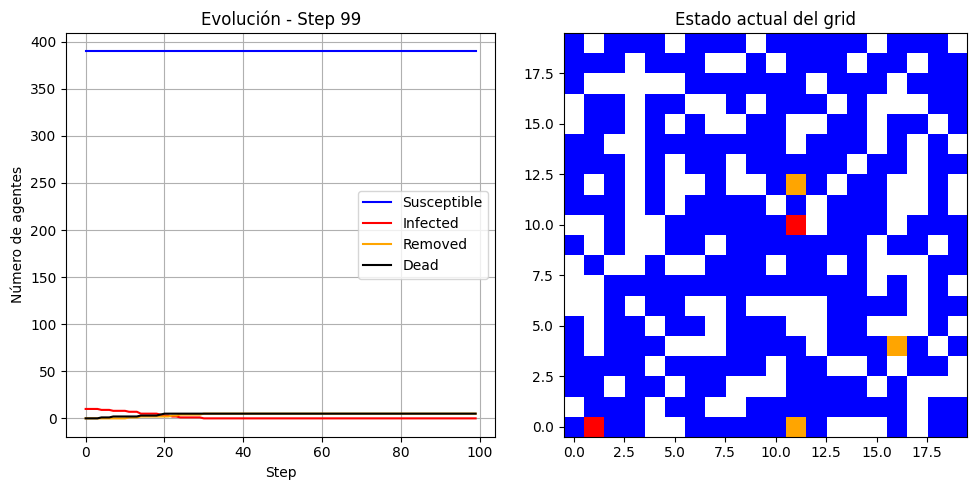

,Step,Susceptible,Infected,Removed,Dead
99,99,390,0,5,5


In [17]:
# Modelo con aislamiento del agente

import time # para medir duración o pausas (aunque no se usa directamente aquí).
import numpy as np
import pandas as pd
import pylab as plt
from mesa import Agent, Model # clase base para cada agente (persona).clase base para el modelo general.
from mesa.time import RandomActivation # hace que los agentes se activen en orden aleatorio.
from mesa.space import MultiGrid # define el espacio donde los agentes se mueven
from mesa.datacollection import DataCollector # recolecta datos de los agentes en cada paso.
import enum # Se usa para definir los estados del agente (susceptible, infectado, removido)

# Librerias que preparan la visualización interactiva con Bokeh y Panel (No las uso en este código)

# from bokeh.plotting import figure, show
# from bokeh.models import ColumnDataSource, Line, Legend, HoverTool, LinearColorMapper
# from bokeh.palettes import Category10
# import panel as pn
# pn.extension()


class InfectionModel(Model):
    """A model for infection spread."""

    def __init__(self, N=10, width=10, height=10, ptrans=0.5,
                 death_rate=0.02, recovery_days=21,
                 recovery_sd=7):

        self.num_agents = N # Número de agentes
        self.recovery_days = recovery_days # Días de recuperación
        self.recovery_sd = recovery_sd # Desviación estándar en días de recuperación
        self.ptrans = ptrans # Probabilidad de ser infectado
        self.death_rate = death_rate # Probabilidad de que un infectado muera
        self.grid = MultiGrid(width, height, True) # Crea el tamaño del grid o la red. El true permite que los agentes compartan celda
        self.schedule = RandomActivation(self) # Define cómo se activan los agentes: en orden aleatorio cada paso
        self.running = True # Controla si el modelo sigue corriendo y guarda agentes muertos
        self.dead_agents = [] # Lista vacía que guarda los agentes muertos


        # CREACIÓN DE LOS AGENTES Y EL ESTADO

        for i in range(self.num_agents):
            a = MyAgent(i, self)
            self.schedule.add(a) # Activación aleatoria de los agentes

            # Adiciona cada gente aleatoriamente en el grid
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))
            # Crea agentes infectados para el inicio (star) aleatoriamente
            infected = np.random.choice([0,1], p=[0.98,0.02]) # Selecciona un número de 0 a 1 con probabilidades de 98% y 2% respectivamente (1 para infectado y 0 para no infectado)
            if infected == 1:
                a.state = State.INFECTED # Etiqueta el estado inicial a (infectado) con un 98% de probabilidad según el random.choise State es una clase
                a.infection_time = self.schedule.time # Inicia el tiempo de infección
                a.recovery_time = self.get_recovery_time() # Tiempo de recuperación

        self.datacollector = DataCollector(agent_reporters={"State": "state"}) # Reporta y guarda los datos de estado (suceptible, infectado, removido) en un diccionario con una etiqueta llamada State y guarda los datos de state

    def get_recovery_time(self): # Defina la función de recuperación
        return int(self.random.normalvariate(self.recovery_days,self.recovery_sd)) # Genera un número aleatorio con base en una distribución normal o gaussiana (media,desviación std)

    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()


##############################################################################

class State(enum.IntEnum): # Crea la clasa estado del agente y le asigna un valor
    SUSCEPTIBLE = 0
    INFECTED = 1
    REMOVED = 2

class MyAgent(Agent): # Crea la clase agente
    """ An agent in an epidemic model."""
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model) # Hereda las dos variables unique_id y model de la clase Agent
        self.age = self.random.normalvariate(20,40) # Ingresa la edad aleatoriamente con 20 años 'media' desviación estándar de 40 años
        self.state = State.SUSCEPTIBLE # El estado es suceptible
        self.infection_time = 0 # Inicializa el tiempo de infección
        self.recovery_time = 0 # Initializa tiempo de recuperación

    def move(self): # Función movimiento del agente

        possible_steps = self.model.grid.get_neighborhood(self.pos,moore=True,include_center=False)
        # self.model.grid : Accede al objeto de la cuadrícula (entorno)
        # get_neighborhood: Método que busca las celdas vecinas
        # self.pos : Posición actual del agente
        # Este parámetro indica que se consideren todos los vecinos en un radio de 3x3, incluyendo las celdas en diagonal. Esto se conoce como el vecindario de Moore
        # Excluye la posición actual del agente del conjunto de celdas vecinas. Esto asegura que el agente se mueva a una nueva celda y no se quede en el mismo lugar.

        new_position = self.random.choice(possible_steps) # Determina la nueva posición del agente
        self.model.grid.move_agent(self, new_position) # Mueve al agente a la nueva posición

    def status(self): # Función estado del agente

        """Verifica el estado de infección del agente"""

        if self.state == State.INFECTED:
            drate = self.model.death_rate # Si el agente se encuentra infectado, este tiene el 2% según el modelo de probabilidad de morir
            alive = np.random.choice([0,1], p=[drate,1-drate]) # Probabilidad de vivir del agente
            if alive == 0:
                self.model.schedule.remove(self) # Remueve el agente infectado (muerto) de la simulación para que no interactúe con ningun otro agente

            else: # Solo revisa la recuperanción si el agente está vivo
                t = self.model.schedule.time-self.infection_time
                if t >= self.recovery_time: # Si el tiempo transcurrido desde la infección es mayor o igual al tiempo de recuperación
                    self.state = State.REMOVED # Si el agente sobrevive y alcanza el tiempo de recuperación, adquiere inmunidad por lo que ya no es infeccioso ni suceptible a infectarse de nuevo


    def contact(self): # Método que encuentra contactos cercanos y propagar la infección

        cellmates = self.model.grid.get_cell_list_contents([self.pos]) # devuelve una lista de todos los agentes que están en la misma celda que este agente.

        if len(cellmates) > 1: # Verificación de si hay más de una agente en la celda. Si el agente está solo, no hay posibilidad de contagiar a nadie, así que se omite el resto.
            for other in cellmates: # Recorre cada agente en la misma celda
                if self.random.random() < self.model.ptrans: # Se genera un número aleatorio entre 0 y 1. Si el número es menor que self.model.ptrans (probabilidad de transmisión)
                                                              # se considera que el contacto fue suficiente para contagiar
                    if self.state is State.INFECTED and other.state is State.SUSCEPTIBLE: # Verifica si el estado del agente actual es infectado y el otro agente es suceptible pero vulnerable
                                                                                          # Solo en este caso se permite el contagio
                        other.state = State.INFECTED # Cambia el estado del otro agente a 'infectado'
                        other.infection_time = self.model.schedule.time # Calcula el tiempo en que el agente fue infectado para verificar más adelante si pasó el tiempo para curarse
                        other.recovery_time = self.model.get_recovery_time() # Asigna el tiempo de recuperación aleatorio teniendo en cuenta el tiempo y la desviación estándar


    def step(self):
        self.status()  # Siempre revisa si debe morir o recuperarse

        if self.state == State.SUSCEPTIBLE:
            self.move()
            self.contact()

        elif self.state == State.REMOVED:
            self.move()  # Opcional: los recuperados pueden moverse pero no contagian

        # Si está infectado, no se mueve ni contagia



##################################################################################

# # Define pop and steps before using them
# pop = 100 # Tamaño de la población
# steps = 100 # Número de pasos (en este caso días)

# model = InfectionModel(pop, 20, 20, ptrans=0.5)
# for i in range(steps):
#     model.step() # Registra cada paso de cada agente (estado, movimiento y contacto)
# agent_state = model.datacollector.get_agent_vars_dataframe() # Extrae los datos recolectados de cada agente en un DataFrame

# ################################################################################

# def get_column_data(model): #  Es una función compacta pero poderosa que transforma los datos recolectados por agente en una tabla agregada por estado y paso de simulación

#     agent_state = model.datacollector.get_agent_vars_dataframe() # Extrae los datos recolectados de cada agente en un DataFrame
#     X = pd.pivot_table(agent_state.reset_index(),index='Step',columns='State',aggfunc=np.size,fill_value=0) # Crea una tabla dinámica (pivot_table) que cuenta cuántos agentes hay en cada estado por paso.
#                                                                                                             # Reset_index() asegura que Step esté como columna, no como índice.
#                                                                                                             # aggfunc=np.size cuenta el número de ocurrencias por combinación Step–State.
#                                                                                                             # fill_value=0 evita valores nulos si algún estado no aparece en un paso.


#     labels = ['Susceptible','Infected','Removed'] # Renombra las columnas
#     X.columns = labels[:len(X.columns)] #
#     return X



# ################################################################################

# ESTO ES SI LAL VISUALIZACIÓN SE HICIESE EN BOKEH Y PANEL (ME ARROJABA ERRO Y ME TOCÓ BUSCAR OTRA ALTERNATIVA DE VISUALIZACIÓN)


# def plot_states_bokeh(model,title=''): # Genera una gráfica interactiva con Bokeh que muestra cómo varía el número de agentes en cada estado (Susceptible, Infected, Removed) a lo largo del tiempo.

#     X = get_column_data(model) # devuelve un DataFrame con conteos por estado y paso.
#     X = X.reset_index() # convierte Step en columna para que Bokeh pueda usarla como eje X.
#     source = ColumnDataSource(X) # Es el formato que Bokeh necesita para vincular datos a los gráficos
#     i=0
#     colors = Category10[3]
#     items=[]
#     p = figure(width=600,height=400,tools=['pan', 'wheel_zoom', 'box_zoom', 'reset', 'hover'],title=title,x_range=(0,100)) # Configura el gráfico
#     for c in X.columns[1:]: # Itera sobre las columnas de estado
#         line = Line(x='Step',y=c, line_color=colors[i],line_width=3,line_alpha=.8,name=c)
#         glyph = p.add_glyph(source, line)
#         i+=1
#         items.append((c,[glyph]))

#     p.xaxis.axis_label = 'Step'
#     p.add_layout(Legend(location='center_right',
#                 items=items))
#     p.background_fill_color = "#e1e1ea"
#     p.background_fill_alpha = 0.5
#     p.legend.label_text_font_size = "10pt"
#     p.title.text_font_size = "15pt"
#     p.toolbar.logo = None
#     p.sizing_mode = 'scale_height'
#     return p


# ################################################################################

# def grid_values(model): # mapear el estado de los agentes en cada celda del grid
#     """Get grid cell states"""

#     agent_counts = np.zeros((model.grid.width, model.grid.height))
#     w=model.grid.width
#     df=pd.DataFrame(agent_counts)
#     for cell in model.grid.coord_iter():
#         agents, x, y = cell
#         c=None
#         for a in agents:
#             c = a.state
#         df.iloc[x,y] = c
#     return df

# def plot_cells_bokeh(model): # visualizar el estado espacial del grid en un paso de simulación usando Bokeh

#     agent_counts = np.zeros((model.grid.width, model.grid.height))
#     w=model.grid.width
#     df=grid_values(model)
#     df = pd.DataFrame(df.stack(), columns=['value']).reset_index()
#     columns = ['value']
#     x = [(i, "@%s" %i) for i in columns]
#     hover = HoverTool(
#         tooltips=x, point_policy='follow_mouse')
#     colors = Category10[3]
#     mapper = LinearColorMapper(palette=colors, low=df.value.min(), high=df.value.max())
#     p = figure(width=500,height=500, tools=[hover], x_range=(-1,w), y_range=(-1,w))
#     p.rect(x="level_0", y="level_1", width=1, height=1,
#        source=df,
#        fill_color={'field':'value', 'transform': mapper},
#        line_color='black')
#     p.background_fill_color = "black"
#     p.grid.grid_line_color = None
#     p.axis.axis_line_color = None
#     p.toolbar.logo = None
#     return p


###############################################################################
# Reinstancia el modelo

#####################################################################################

import matplotlib.pyplot as plt
from IPython.display import clear_output

# Reinstancia el modelo
steps = 100
pop = 400 # Número de población



model = InfectionModel(pop, 20, 20, ptrans=0.5, death_rate=0.02)

# Inicializa listas para guardar los conteos
susceptible = []
infected = []
removed = []
dead=[]

# Simulación paso a paso con visualización
for i in range(steps):
    model.step()
    X = get_column_data(model)
    s = X['Susceptible'].iloc[-1] if 'Susceptible' in X.columns else 0
    inf = X['Infected'].iloc[-1] if 'Infected' in X.columns else 0
    rem = X['Removed'].iloc[-1] if 'Removed' in X.columns else 0
    dea=pop-(s+inf+rem)

    susceptible.append(s)
    infected.append(inf)
    removed.append(rem)
    dead.append(dea)

    # Visualiza en tiempo real ambas gráficas
    clear_output(wait=True)
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Gráfico de evolución temporal
    axs[0].plot(susceptible, label='Susceptible', color='blue')
    axs[0].plot(infected, label='Infected', color='red')
    axs[0].plot(removed, label='Removed', color='orange')
    axs[0].plot(dead, label='Dead', color='black')
    axs[0].set_title(f"Evolución - Step {i}")
    axs[0].set_xlabel("Step")
    axs[0].set_ylabel("Número de agentes")
    axs[0].legend()
    axs[0].grid(True)

    # Gráfico del estado actual del grid

    from matplotlib.colors import ListedColormap

    # Colores consistentes con evolución temporal
    custom_cmap = ListedColormap(['blue', 'red', 'orange'])

    # Dentro del bucle de simulación
    grid = grid_values(model)
    im = axs[1].imshow(grid.values.T, cmap=custom_cmap, origin='lower')
    axs[1].set_title("Estado actual del grid")
    axs[1].axis('on')



    plt.tight_layout()
    plt.show()


# Implementar tabla

import pandas as pd
dead = [pop - (s + i + r) for s, i, r in zip(susceptible, infected, removed)]

# Crear tabla con los datos de cada step
tabla_resultados = pd.DataFrame({
    'Step': list(range(steps)),
    'Susceptible': susceptible,
    'Infected': infected,
    'Removed': removed, 'Dead': dead})

# Mostrar la tabla completa
#tabla_resultados
tabla_resultados.tail(1)

- Simulaciones realizadas con la modificación de que el agente una vez infectado no pueda interactuar con los demás agentes.

$$
\begin{array}{|c|c|c|c|c|}
\hline
\begin{array}{c}\textbf{Simulaciones}\\\textbf{realizadas (100 steps)}\end{array} & \textbf{Población} & \textbf{Tamaño cuadrilla} & \textbf{Prob.Muerte %} & \textbf{Prob.Infección %} &\textbf{Promedio Muertos} & \begin{array}{c}\textbf{Desv. estándar}\\\textbf{muertos}\end{array} \\
\hline
10 & 400 & 10 x 10 & 2 & 50 & 2.9 & 1.85 \\
10 & 400 & 5 x 5 & 2 & 50 & 3.3 & 1.89 \\
10 & 400 & 10 x 10 & 50 & 100 & 7.9 & 2.56 \\
10 & 400 & 5 x 5 & 50 & 100 & 8.7 & 1.89 \\
\hline
\end{array}
$$

- Como se puede evidenciar, aún aumentando la probalidad de infección y muerte, si el agente es aislado el número de muertes disminuye considerablemente.